<a href="https://colab.research.google.com/github/springboardmentor2507-alt/AI-Powered-NIDS/blob/Samyak-Biswas/Samyak_task_SENTINEL_NET_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/KDDTrain+_20Percent.txt")

In [ ]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         25191 non-null  int64  
 1   tcp       25191 non-null  object 
 2   ftp_data  25191 non-null  object 
 3   SF        25191 non-null  object 
 4   491       25191 non-null  int64  
 5   0.1       25191 non-null  int64  
 6   0.2       25191 non-null  int64  
 7   0.3       25191 non-null  int64  
 8   0.4       25191 non-null  int64  
 9   0.5       25191 non-null  int64  
 10  0.6       25191 non-null  int64  
 11  0.7       25191 non-null  int64  
 12  0.8       25191 non-null  int64  
 13  0.9       25191 non-null  int64  
 14  0.10      25191 non-null  int64  
 15  0.11      25191 non-null  int64  
 16  0.12      25191 non-null  int64  
 17  0.13      25191 non-null  int64  
 18  0.14      25191 non-null  int64  
 19  0.15      25191 non-null  int64  
 20  0.16      25191 non-null  in

In [ ]:
data.isnull().sum()

,0
0,0
tcp,0
ftp_data,0
SF,0
491,0
0.1,0
0.2,0
0.3,0
0.4,0
0.5,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,25191.000000,2.519100e+04,2.519100e+04,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,...,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,305.066214,2.433157e+04,3.491986e+03,0.000079,0.023739,0.000040,0.198047,0.001191,0.394784,0.227859,...,115.066611,0.519805,0.082541,0.147452,0.031846,0.285812,0.279857,0.117803,0.118774,19.487674
std,2686.608278,2.410853e+06,8.883248e+04,0.008910,0.260226,0.006301,2.154244,0.045419,0.488814,10.417559,...,110.647591,0.448947,0.187195,0.308373,0.110577,0.445322,0.446081,0.305875,0.317339,2.328585
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,5.305000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
data.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [ ]:
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
    "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
    "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
    "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",        # normal / attack type
    "attack_class"  # DoS, Probe, R2L, U2R etc.
]

data.columns = columns

In [ ]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'attack_class'],
      dtype='object')

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


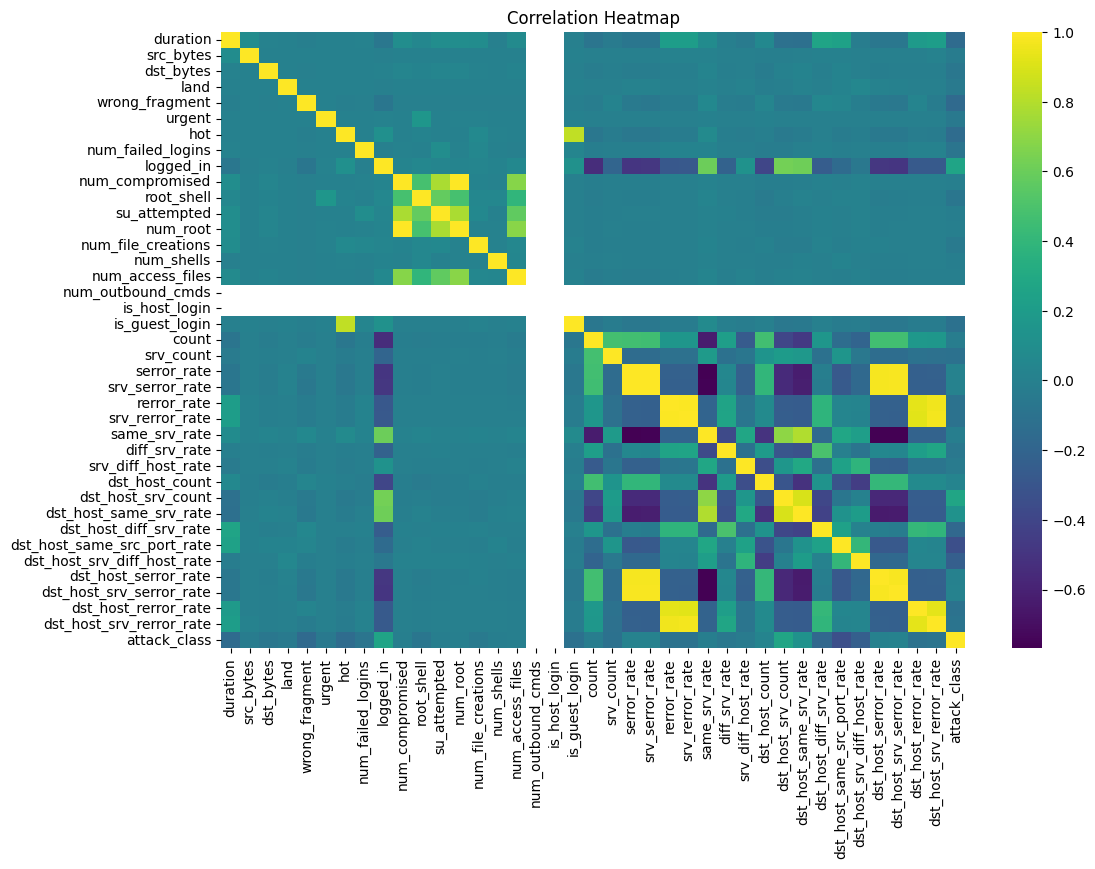

In [ ]:
num_data = data.select_dtypes(include=['int64', 'float64'])

corr = num_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

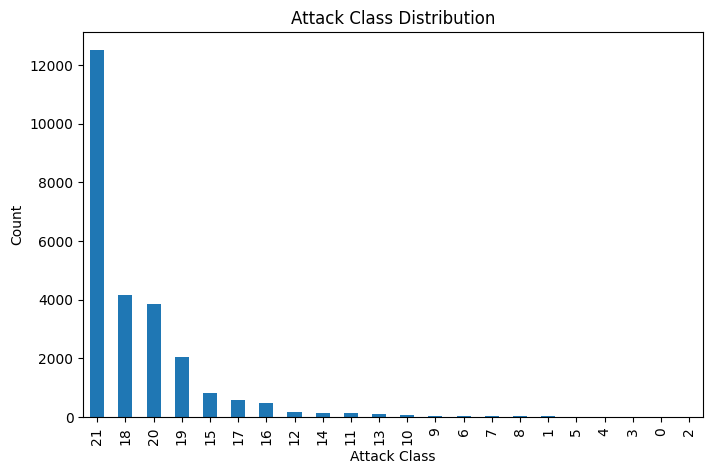

In [ ]:
data['attack_class'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Attack Class Distribution")
plt.xlabel("Attack Class")
plt.ylabel("Count")
plt.show()